In [3]:
class Student:
    def __init__(self, name, group, grades):
        self.name = name
        self.group = group
        self.grades = grades

    def average_grade(self):
        if not self.grades:
            return 0
        return sum(self.grades) / len(self.grades)

    def is_excellent(self):
        return self.average_grade() >= 4.5


def read_students_from_file(filename):
    students = []
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            # Формат: Имя;Группа;Оценка1,Оценка2,Оценка3
            parts = line.split(';')
            name = parts[0]
            group = parts[1]
            grades = list(map(int, parts[2].split(','))) if parts[2] else []
            students.append(Student(name, group, grades))
    return students


def write_excellent_students(students, filename):
    with open(filename, 'w', encoding='utf-8') as f:
        for s in students:
            if s.is_excellent():
                f.write(f'{s.name} - {s.group}\n')


def average_by_group(students):
    groups = {}
    for s in students:
        groups.setdefault(s.group, []).append(s.average_grade())
    avg_by_group = {group: sum(grades) / len(grades) for group, grades in groups.items()}
    return avg_by_group


if __name__ == "__main__":
    filename_students = 'students.txt'
    filename_excellent = 'excellent_students.txt'

    students_list = read_students_from_file(filename_students)
    write_excellent_students(students_list, filename_excellent)
    group_averages = average_by_group(students_list)

    for group, avg in group_averages.items():
        print(f'Средний балл группы {group}: {avg:.2f}')


Средний балл группы 101: 4.17
Средний балл группы 102: 5.00


In [5]:
import re

def analyze_log(log_text):
    ips = re.findall(r'\b(?:\d{1,3}\.){3}\d{1,3}\b', log_text)
    timestamps = re.findall(r'\b\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\b', log_text)
    uppercases = re.findall(r'\b[A-ZА-ЯЁ]{2,}\b', log_text)
    replaced_emails = re.sub(r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+', '[EMAIL PROTECTED]', log_text)
    return ips, timestamps, uppercases, replaced_emails


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def pandas_sales_processing(data):
    df = pd.DataFrame(data)
    median_price = df['Цена'].median()
    df['Цена'].fillna(median_price, inplace=True)
    df = df[(df['Количество'] >= 1) & (df['Количество'] <= 1000)]
    df['Общая_стоимость'] = df['Цена'] * df['Количество']
    grouped = df.groupby('Товар')['Общая_стоимость'].sum()
    grouped.plot(kind='bar', title='Суммарная выручка по товарам')
    plt.ylabel('Выручка')
    plt.xlabel('Товар')
    plt.tight_layout()
    plt.show()
    return df, grouped


In [7]:
import numpy as np

def numpy_operations():
    A = np.random.randint(1, 11, (5, 5))
    B = np.random.randint(1, 11, (5, 5))
    elem_prod = A * B
    mat_prod = A @ B
    det_A = np.linalg.det(A)
    B_trans = B.T
    try:
        A_inv = np.linalg.inv(A)
    except np.linalg.LinAlgError:
        A_inv = None
    C = A.sum(axis=1).reshape(5, 1)
    if A_inv is not None:
        x = np.linalg.solve(A, C)
    else:
        x = None
    return {'A': A, 'B': B, 'elem_prod': elem_prod, 'mat_prod': mat_prod,
            'det_A': det_A, 'B_trans': B_trans, 'A_inv': A_inv, 'x': x}


In [11]:
def safe_apply(func, data):
    results = []
    errors = []
    for element in data:
        try:
            results.append(func(element))
        except Exception as e:
            errors.append((element, type(e).__name__))
    return results, errors

import math
data = ['4', '16', 'text', '-25', '9.0']
res, err = safe_apply(lambda x: math.sqrt(float(x)), data)
print('Результаты:', res)
print('Ошибки:', err)


Результаты: [2.0, 4.0, 3.0]
Ошибки: [('text', 'ValueError'), ('-25', 'ValueError')]


In [9]:
import time

class Timer:
    def __enter__(self):
        self.start = time.time()
        return self
    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time.time()
        print(f'Время выполнения: {self.end - self.start:.4f} секунд')

In [10]:
with Timer():
    numpy_results = numpy_operations()

Время выполнения: 0.0158 секунд


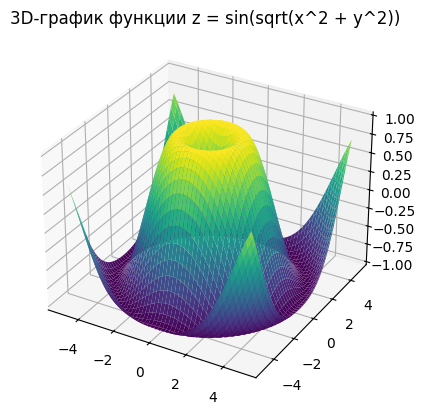

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_surface():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.sin(np.sqrt(X**2 + Y**2))
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title('3D-график функции z = sin(sqrt(x^2 + y^2))')
    plt.show()

# Запуск
plot_surface()
